In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [1]:
def dnorm(x, mean, sd):
  '''
  Returns the x value following a gaussian distribution N(mean,sd)
  '''
  return 1 / (np.sqrt(2 * np.pi) * sd) * np.exp(-((x-mean)/sd)** 2 / 2)

def gaussian_kernel(k_size, mean, sd, alpha):
  '''
  Creates a 2D gaussian kernel following a N(mean, sd) Gaussian distribution 
  and applying an alpha transparency
  '''

  # Crates a 1D kernel between [-k_size/2, k_size/2] of k_size lenght
  kernel_1D = np.linspace(-(k_size // 2), k_size // 2, k_size)

  # Applies a gaussian normalization to the 1D kernel
  for i in range(k_size):
      kernel_1D[i] = dnorm(kernel_1D[i], mean, sd)

  # Creates a 2D kernel extending the 1D
  kernel_2D = np.outer(kernel_1D, kernel_1D)

  # Normalizes between [0,1]
  kernel_2D /= kernel_2D.max()

  # Applies transparency
  kernel_2D *= alpha

  return kernel_2D

In [3]:
def generate_img_signal(size = 100,
                    background_value = 0.5,
                    noise_mean = 0, 
                    noise_sd = 0.1, 
                    signal_mean = 0, 
                    signal_sd = 10,
                    signal_transparency = 0.3,
                    apply_noise = True,
                    apply_signal = True,
                    show = False):
  '''
  Generates a square image: img = background + noise + signal
  noise = N(noise_mean, noise_sd)
  signal = N(signal_mean, signal_sd)*signal_transparency
  '''

  # Creates an only background image
  image = np.full((size, size), background_value)

  # Applies Gaussian noise
  if apply_noise:
    image += np.random.normal(noise_mean, noise_sd, (size, size))

  # Applies Gaussian signal
  if apply_signal:
  # Zero-mean Gaussian signal
    image += gaussian_kernel(size, signal_mean, signal_sd, signal_transparency)

  if show:
    plt.imshow(image, cmap='gray', vmin=0, vmax=1)

  return image

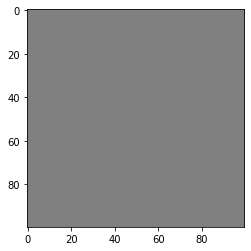

In [4]:
img = generate_img_signal(show = True, apply_noise=False, apply_signal=False)

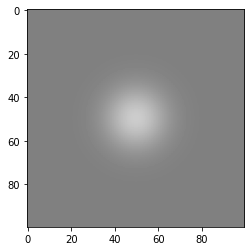

In [5]:
img = generate_img_signal(show = True, apply_noise=False, apply_signal=True)

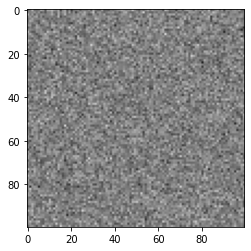

In [6]:
img = generate_img_signal(show = True, apply_noise=True, apply_signal=False)

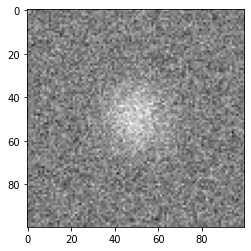

In [7]:
img = generate_img_signal(show = True)